In [1]:
def cat_plot_bar_chart(column):
    print("_____________________________________________\n")
    print(f'the value counts for {column} are \n{df[column].value_counts()}')
    print("_____________________________________________\n")
    print(f'the null value for {column} is \n{df[column].isnull().sum()}')
    print("_____________________________________________\n")
    fig = px.bar(df[column].value_counts(), color = df[column].value_counts().index, title =column)
    fig.update_layout(width = 900)
    fig.show()
   



In [2]:
def handle_outliers_zscore(df, column_name, threshold=3):
    column = df[column_name]
    z_scores = np.abs((column - column.mean()) / column.std())
    return df[[column_name [z_scores < threshold ]]]


In [3]:
def num_plot_hist(column):
    print("_____________________________________________\n")
    print(f'the value counts for {column} are \n{df[column].value_counts()}')
    print("_____________________________________________\n")
    print(f'the null value for {column} is \n{df[column].isnull().sum()}')
    print("_____________________________________________\n")
    plt.style.use("ggplot")
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(df[column], kde=True)
    plt.title(column)

In [4]:
def hist(column):
    plt.style.use("ggplot")
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(df[column], kde=True)
    plt.title(column)

In [5]:
def IQR(name):
    Q1 = df[name].quantile(0.25)
    Q3 = df[name].quantile(0.75)
    print(f"Q1  {name}  {Q1}, Q3  {name}  {Q3}")
    print("---------------------------------------")
    iqr = Q3 - Q1
    print(f"IQR for {name} is equal to {iqr}")
    print("---------------------------------------")
    upper_limit = Q1 + 1.5 * iqr
    lower_limit = df[name].quantile(0.15)
    
    return (upper_limit,lower_limit)

In [6]:
def box_plot(name):
    # Create subplots to display multiple box plots side by side
    plt.figure(figsize=(8, 4))

    # Box plot for 'price' column
    sns.boxplot(x=df[name], color='#FFA570')
    plt.xlabel(name)
    plt.title(f'Box Plot of {name}')


# About the data

In [87]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import warnings
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek

warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'imblearn'

In [8]:
df = pd.read_csv('Train-Set.csv')
df

Unnamed: 0     id  age            job   marital    education default  \
0           56963  31963   47    blue-collar   married     basic.9y      no   
1           31753  21378   48     management  divorced     tertiary      no   
2           60854  17084   38     technician    single  high.school      no   
3           34207  81693   50     management  divorced     tertiary      no   
4           73066  63978   54  self-employed   married  high.school      no   
...           ...    ...  ...            ...       ...          ...     ...   
54707       21243  38468   35     management   married     tertiary      no   
54708       45891   4378   31       services   married  high.school      no   
54709       42613  65128   35     management   married     tertiary      no   
54710       43567    782   70        retired   married    secondary      no   
54711       68268  27312   51        retired   married     basic.4y      no   

       balance housing loan    contact  day month  duration  campaign  pdays  \
0          NaN      no  yes   cellular  apr   fri       583         2    999   
1        351.0     yes   no   cellular    7   apr       725         3     -1   
2          NaN      no   no   cellular  aug   wed        74         2    999   
3       1270.0     yes   no   cellular    4   may        24         3     -1   
4          NaN     yes  yes   cellular  aug   thu       904         3    999   
...        ...     ...  ...        ...  ...   ...       ...       ...    ...   
54707    750.0     yes   no   cellular   18   aug       233        12     -1   
54708      NaN      no   no  telephone  may   wed       636         6    999   
54709    323.0      no   no   cellular   11   jan       261         2     -1   
54710    616.0      no   no   cellular   27   apr       149         2    182   
54711      NaN      no   no   cellular  jul   wed      1057         1     13   

       previous     poutcome Target  
0             1      failure     no  
1             0      unknown     no  
2             0  nonexistent     no  
3             0      unknown     no  
4             0  nonexistent    yes  
...         ...          ...    ...  
54707         0      unknown     no  
54708         0  nonexistent     no  
54709         0      unknown    yes  
54710         1      failure     no  
54711         1      success     no  

[54712 rows x 19 columns]

In [9]:
# We need to check missing values in dataset
df.isnull().sum()

Unnamed: 0        0
id                0
age               0
job               0
marital           0
education         0
default           0
balance       22870
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
Target            0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54712 entries, 0 to 54711
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  54712 non-null  int64  
 1   id          54712 non-null  int64  
 2   age         54712 non-null  int64  
 3   job         54712 non-null  object 
 4   marital     54712 non-null  object 
 5   education   54712 non-null  object 
 6   default     54712 non-null  object 
 7   balance     31842 non-null  float64
 8   housing     54712 non-null  object 
 9   loan        54712 non-null  object 
 10  contact     54712 non-null  object 
 11  day         54712 non-null  object 
 12  month       54712 non-null  object 
 13  duration    54712 non-null  int64  
 14  campaign    54712 non-null  int64  
 15  pdays       54712 non-null  int64  
 16  previous    54712 non-null  int64  
 17  poutcome    54712 non-null  object 
 18  Target      54712 non-null  object 
dtypes: float64(1), int64(7), 

In [11]:
# To check duplicated values 
df.duplicated().value_counts()

False    54712
dtype: int64

In [12]:
df.drop(columns=['Unnamed: 0','id','pdays'],inplace=True)

In [13]:
# check the data types
df.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day           object
month         object
duration       int64
campaign       int64
previous       int64
poutcome      object
Target        object
dtype: object

****

## describe for numatical data befor preprocessing

In [14]:
df.describe().T

count         mean          std     min    25%    50%     75%  \
age       54712.0    40.580147    10.544504    17.0   32.0   39.0    48.0   
balance   31842.0  1368.024590  3057.847866 -8019.0   73.0  449.0  1435.0   
duration  54712.0   257.282260   255.270335     0.0  103.0  180.0   318.0   
campaign  54712.0     2.679961     2.966822     1.0    1.0    2.0     3.0   
previous  54712.0     0.407351     1.520253     0.0    0.0    0.0     0.0   

              max  
age          98.0  
balance   98417.0  
duration   4199.0  
campaign     58.0  
previous     58.0

***

## describe for categorical data befor preprocessing

In [15]:
df.describe(include="object").T

count unique          top   freq
job        54712     12  blue-collar  12042
marital    54712      4      married  33095
education  54712     11    secondary  16357
default    54712      3           no  49368
housing    54712      3          yes  29666
loan       54712      3           no  45564
contact    54712      3     cellular  35134
day        54712     41          may   7636
month      54712     17          may   9651
poutcome   54712      5      unknown  26057
Target     54712      2           no  48433

***

## check for class imbalance


In [16]:
# Lets count numbers of row for Target type
df.groupby("Target").size()

Target
no     48433
yes     6279
dtype: int64

Text(0.5, 1.0, 'target variable')

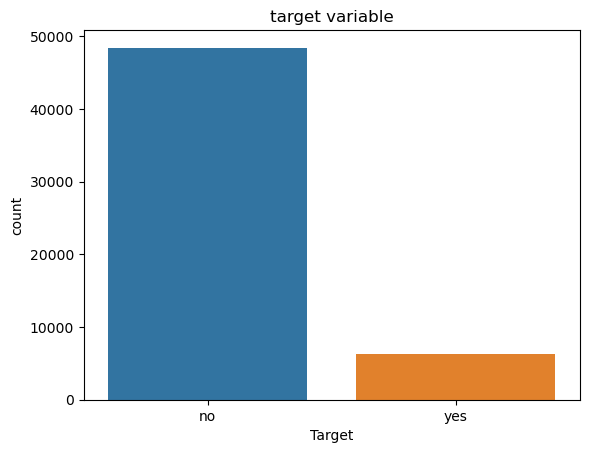

In [17]:
sns.countplot(df["Target"])
plt.title("target variable")

In [18]:
# percentage of class present in target variable(y) 
print("percentage of NO and YES\n",df["Target"].value_counts()/len(df)*100)

percentage of NO and YES
 no     88.523541
yes    11.476459
Name: Target, dtype: float64




The class distribution in the target variable is ~88:11 indicating an imbalance dataset


***
***
***

## Categorical column
##### 1. job 	
##### 2. marital 	
##### 3. education 	
##### 4. default 	
##### 5. housing 
##### 6. loan 
##### 7. contact 
##### 8. day
##### 9. month
##### 10. poutcome 
##### 11. Targe



### univariate analysis of categorical variables

***
### `job`

In [19]:
cat_plot_bar_chart('job')

_____________________________________________

the value counts for job are 
blue-collar      12042
admin.            9346
technician        9122
management        8292
services          5148
retired           2557
self-employed     1883
entrepreneur      1876
unemployed        1463
housemaid         1457
student           1150
unknown            376
Name: job, dtype: int64
_____________________________________________

the null value for job is 
0
_____________________________________________



* as we can see the four-top job are blue-collar, admin, technicians, management

***
### `marital`

In [20]:
cat_plot_bar_chart('marital')

_____________________________________________

the value counts for marital are 
married     33095
single      15362
divorced     6209
unknown        46
Name: marital, dtype: int64
_____________________________________________

the null value for marital is 
0
_____________________________________________



In [21]:
fig=px.pie(df.marital,df.marital.values, hole = 0.03 , title = 'Marital')
fig.update_layout(width = 600, height = 600)
fig.update_traces(textposition='inside', textinfo='percent+label',textfont_size=13,pull=0.01)
fig.show()

* A huge number of the customers are married

***
### `education`

In [22]:
cat_plot_bar_chart('education')

_____________________________________________

the value counts for education are 
secondary              16357
tertiary                9313
university.degree       6741
high.school             5292
primary                 4854
basic.9y                3380
professional.course     2925
unknown                 2276
basic.4y                2256
basic.6y                1306
illiterate                12
Name: education, dtype: int64
_____________________________________________

the null value for education is 
0
_____________________________________________



***
### `default`

In [23]:
cat_plot_bar_chart('default')

_____________________________________________

the value counts for default are 
no         49368
unknown     4754
yes          590
Name: default, dtype: int64
_____________________________________________

the null value for default is 
0
_____________________________________________



* Majority of the customers do not have a credit in default

***
### `housing`

In [24]:
cat_plot_bar_chart('housing')

_____________________________________________

the value counts for housing are 
yes        29666
no         24503
unknown      543
Name: housing, dtype: int64
_____________________________________________

the null value for housing is 
0
_____________________________________________



***
### `loan`

In [25]:
cat_plot_bar_chart('loan')

_____________________________________________

the value counts for loan are 
no         45564
yes         8605
unknown      543
Name: loan, dtype: int64
_____________________________________________

the null value for loan is 
0
_____________________________________________



***
### `contact`

In [26]:
cat_plot_bar_chart('contact')

_____________________________________________

the value counts for contact are 
cellular     35134
telephone    10424
unknown       9154
Name: contact, dtype: int64
_____________________________________________

the null value for contact is 
0
_____________________________________________



* Cell-phones seem to be the most favoured method of reaching out to customers.

***
### `month`

In [27]:
cat_plot_bar_chart('month')

_____________________________________________

the value counts for month are 
may    9651
jul    4875
thu    4758
mon    4728
wed    4508
tue    4483
aug    4437
fri    4393
jun    3720
nov    2815
apr    2076
feb    1878
jan     972
oct     500
sep     432
mar     335
dec     151
Name: month, dtype: int64
_____________________________________________

the null value for month is 
0
_____________________________________________



* as we can see here there is an irrelative classes for month column like days so i think they are a mixed between the month and day column lets check that theory 

***
### `day`

In [28]:
cat_plot_bar_chart('day')

_____________________________________________

the value counts for day are 
may    7636
jul    4019
aug    3394
jun    2980
nov    2302
20     1958
18     1603
21     1443
apr    1425
17     1374
6      1368
5      1337
8      1322
14     1303
7      1279
28     1268
29     1208
19     1202
15     1195
13     1117
30     1107
12     1104
9      1091
11     1078
4      1039
16      991
2       896
27      776
26      761
3       752
23      656
22      649
25      600
31      468
oct     412
10      372
sep     320
24      300
mar     281
1       225
dec     101
Name: day, dtype: int64
_____________________________________________

the null value for day is 
0
_____________________________________________



the first part of our theory was true , as we can see they are a classes that belong to a month column are in day column so let's check if all of our theory is correct ,
what we want do :
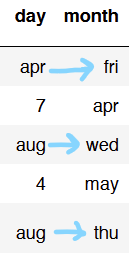

In [29]:
for index, row in df.iterrows():
    if row['day'] in df['month'].values:
        df.at[index, 'month'] = row['day']

In [30]:
cat_plot_bar_chart('month')

_____________________________________________

the value counts for month are 
may    17287
jul     8894
aug     7831
jun     6700
nov     5117
apr     3501
feb     1878
jan      972
oct      912
sep      752
mar      616
dec      252
Name: month, dtype: int64
_____________________________________________

the null value for month is 
0
_____________________________________________



* Many customers have been contacted in the month of May.

> wow, our theory was true .
so now we done with month column now we want to see what we will do with day column.
i will drop the day column because its contain a days name like sunday ...etc, and number like 21,10,9 so we cant detect a one pattern for this column ans cant deal with this two pattern in the same column 


In [31]:
df.drop(columns=['day'],inplace=True)
df

age            job   marital    education default  balance housing  \
0       47    blue-collar   married     basic.9y      no      NaN      no   
1       48     management  divorced     tertiary      no    351.0     yes   
2       38     technician    single  high.school      no      NaN      no   
3       50     management  divorced     tertiary      no   1270.0     yes   
4       54  self-employed   married  high.school      no      NaN     yes   
...    ...            ...       ...          ...     ...      ...     ...   
54707   35     management   married     tertiary      no    750.0     yes   
54708   31       services   married  high.school      no      NaN      no   
54709   35     management   married     tertiary      no    323.0      no   
54710   70        retired   married    secondary      no    616.0      no   
54711   51        retired   married     basic.4y      no      NaN      no   

      loan    contact month  duration  campaign  previous     poutcome Target  
0      yes   cellular   apr       583         2         1      failure     no  
1       no   cellular   apr       725         3         0      unknown     no  
2       no   cellular   aug        74         2         0  nonexistent     no  
3       no   cellular   may        24         3         0      unknown     no  
4      yes   cellular   aug       904         3         0  nonexistent    yes  
...    ...        ...   ...       ...       ...       ...          ...    ...  
54707   no   cellular   aug       233        12         0      unknown     no  
54708   no  telephone   may       636         6         0  nonexistent     no  
54709   no   cellular   jan       261         2         0      unknown    yes  
54710   no   cellular   apr       149         2         1      failure     no  
54711   no   cellular   jul      1057         1         1      success     no  

[54712 rows x 15 columns]

***
### `poutcome`

In [32]:
cat_plot_bar_chart('poutcome')

_____________________________________________

the value counts for poutcome are 
unknown        26057
nonexistent    19704
failure         5809
success         1855
other           1287
Name: poutcome, dtype: int64
_____________________________________________

the null value for poutcome is 
0
_____________________________________________



***
### `Target`

In [33]:
cat_plot_bar_chart('Target')

_____________________________________________

the value counts for Target are 
no     48433
yes     6279
Name: Target, dtype: int64
_____________________________________________

the null value for Target is 
0
_____________________________________________



* The plot for the target variable shows heavy imbalance in the target variable. 

***

***

### Univariate analysis of Numerical columns

##### 1. age
##### 2. balance
##### 3. duration
##### 4. campaign
##### 5. pdays
##### 6. previous

_____________________________________________

the value counts for age are 
32    2525
31    2498
33    2384
34    2311
35    2303
      ... 
89       2
98       1
92       1
91       1
90       1
Name: age, Length: 79, dtype: int64
_____________________________________________

the null value for age is 
0
_____________________________________________



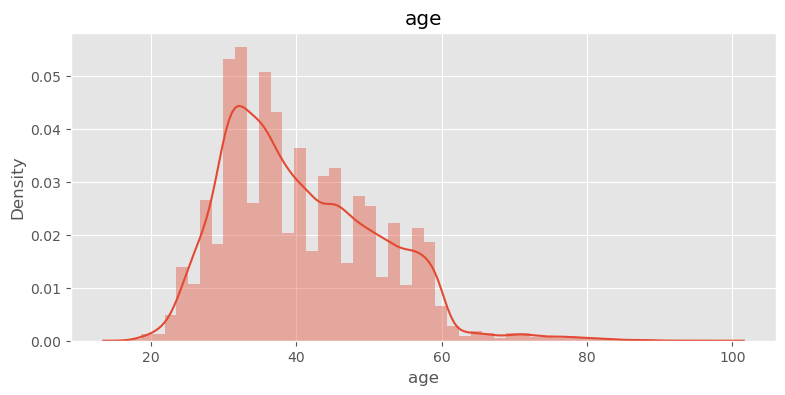

In [34]:
num_plot_hist('age')

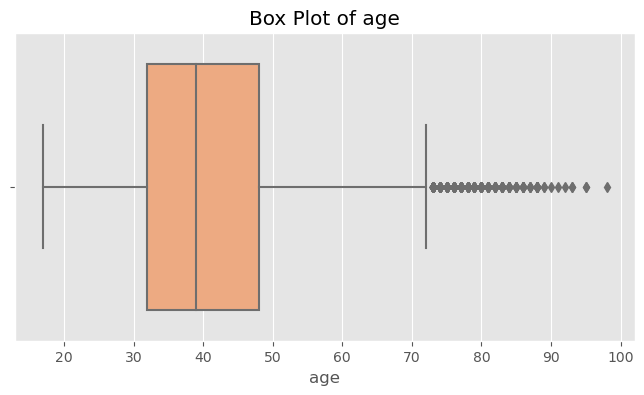

In [35]:
box_plot('age')

#### Handling Outliers

* as we can see from the histogram the skewed and from the box plot the outlier i will apply the IQR in age column

In [36]:
upper_limit_age,lower_limit_age = IQR('age')

Q1  age  32.0, Q3  age  48.0
---------------------------------------
IQR for age is equal to 16.0
---------------------------------------


In [37]:
df = df[(df['age'] < upper_limit_age) & (df['age'] > lower_limit_age)]

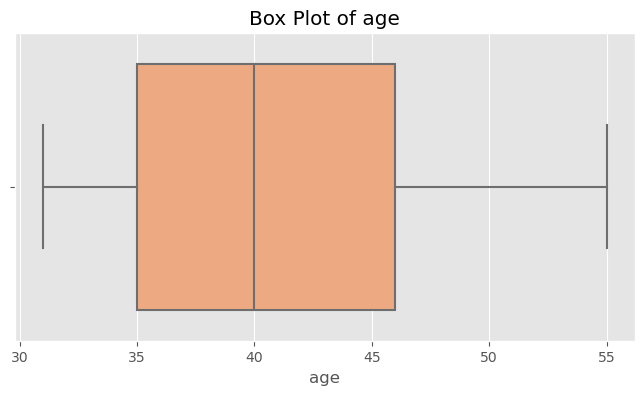

In [38]:
box_plot('age')

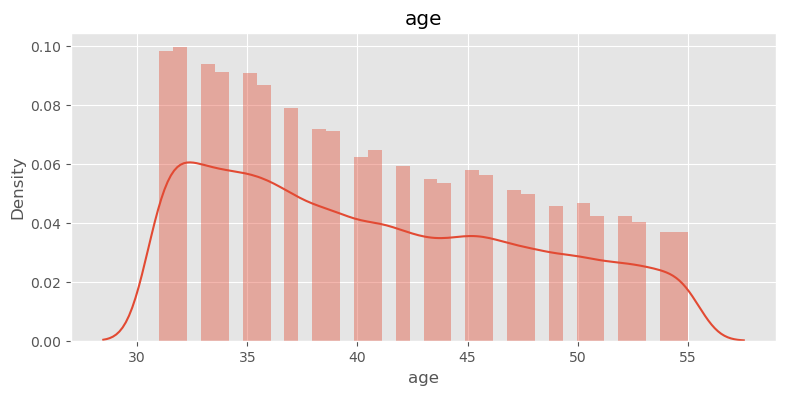

In [39]:
hist('age')

***
### `balance`

_____________________________________________

the value counts for balance are 
 0.0        1935
 1.0          98
 4.0          65
 3.0          61
 2.0          59
            ... 
 7296.0        1
 11269.0       1
 16786.0       1
-631.0         1
-665.0         1
Name: balance, Length: 5485, dtype: int64
_____________________________________________

the null value for balance is 
16723
_____________________________________________



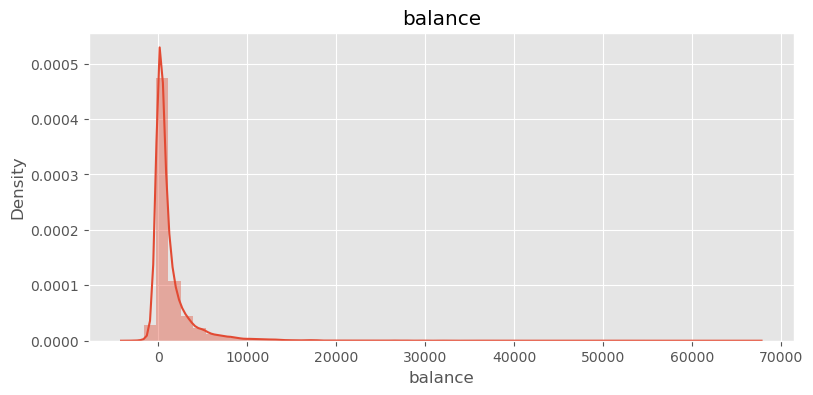

In [40]:
num_plot_hist('balance')

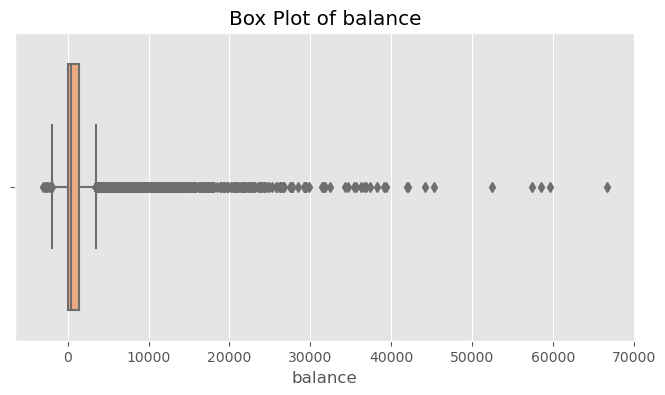

In [41]:
box_plot('balance')

#### Handling Outliers

In [42]:
upper_limit_balance,lower_limit_balance= IQR('balance')

Q1  balance  67.0, Q3  balance  1421.75
---------------------------------------
IQR for balance is equal to 1354.75
---------------------------------------


In [43]:
df = df[(df['balance'] < upper_limit_balance) & (df['balance'] > lower_limit_balance)]

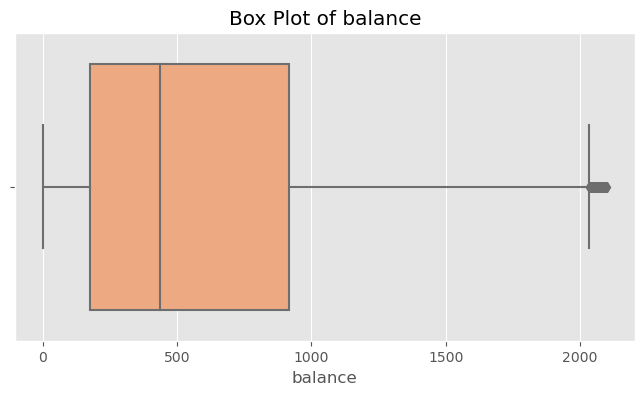

In [44]:
box_plot('balance')

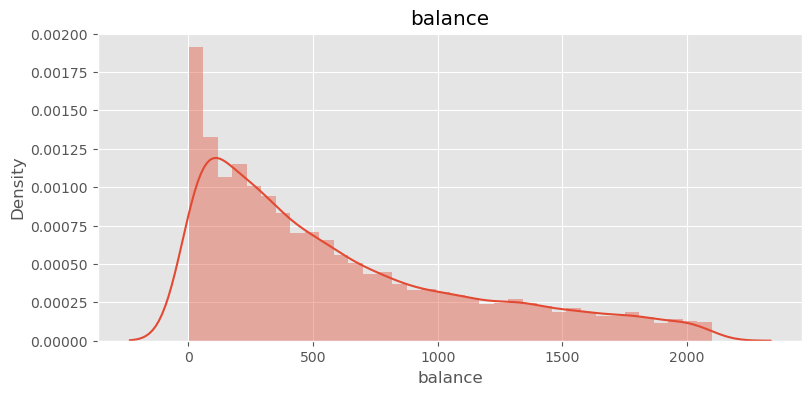

In [45]:
hist('balance')

In [46]:
df['balance'].isnull().sum()

0

***
### ` duration`

_____________________________________________

the value counts for duration are 
76      69
80      68
102     68
148     65
82      65
        ..
2150     1
2330     1
1240     1
746      1
1277     1
Name: duration, Length: 1179, dtype: int64
_____________________________________________

the null value for duration is 
0
_____________________________________________



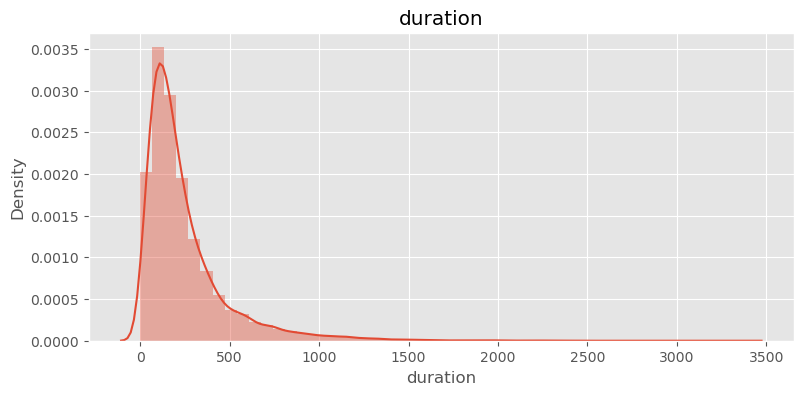

In [47]:
num_plot_hist('duration')

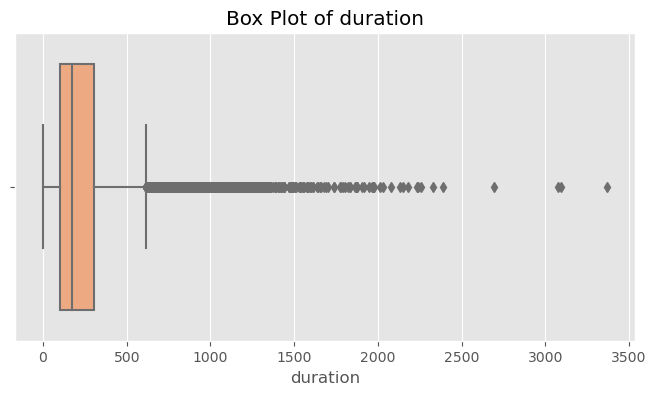

In [48]:
box_plot('duration')

#### Handling Outliers

In [49]:
upper_limit_duration,lower_limit_duration = IQR('duration')

Q1  duration  99.0, Q3  duration  305.0
---------------------------------------
IQR for duration is equal to 206.0
---------------------------------------


In [50]:
df = df[(df['duration'] < upper_limit_duration) & (df['duration'] > lower_limit_duration)]

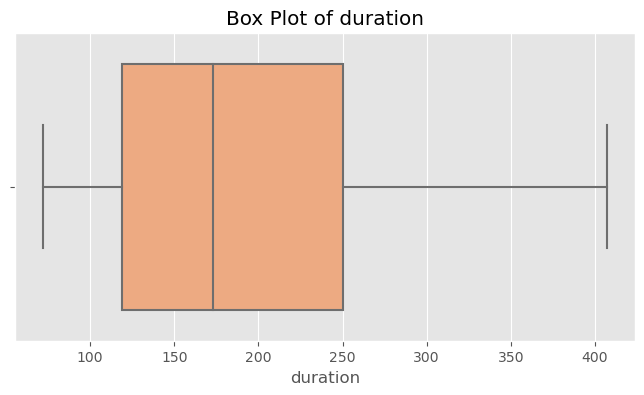

In [51]:
box_plot('duration')

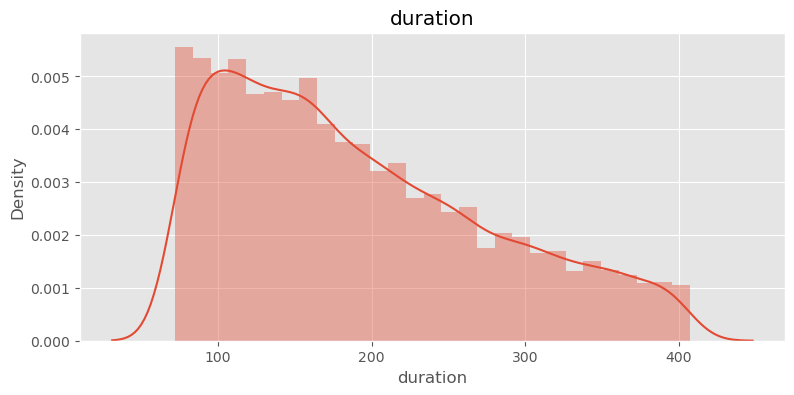

In [52]:
hist('duration')

***
### `campaign`

_____________________________________________

the value counts for campaign are 
1     4123
2     3034
3     1352
4      827
5      391
6      306
7      152
8      120
9       56
10      49
11      36
12      34
13      25
14      21
15      15
16      12
17      11
18       9
21       7
19       6
20       4
22       3
28       2
23       2
24       2
25       1
29       1
50       1
31       1
32       1
33       1
Name: campaign, dtype: int64
_____________________________________________

the null value for campaign is 
0
_____________________________________________



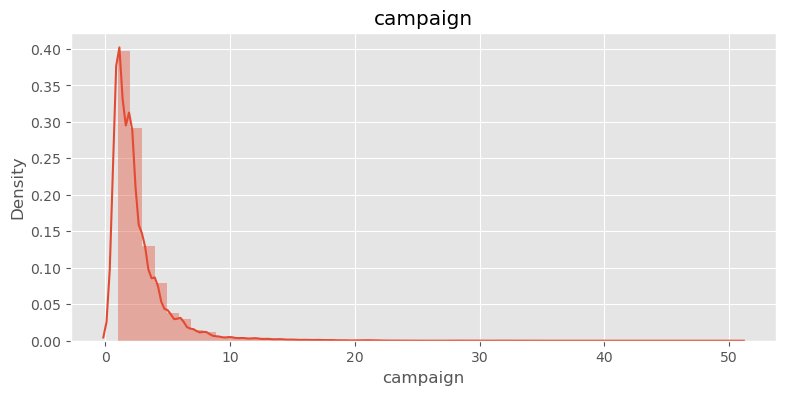

In [53]:
num_plot_hist('campaign')

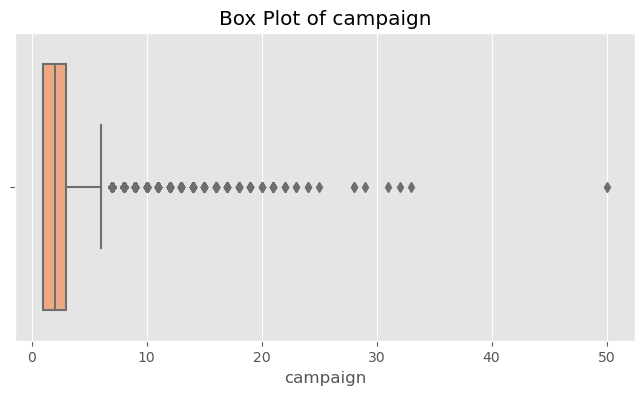

In [54]:
box_plot('campaign')

#### Handling Outliers

In [55]:
upper_limit_campaign,lower_limit_campaign = IQR('campaign')

Q1  campaign  1.0, Q3  campaign  3.0
---------------------------------------
IQR for campaign is equal to 2.0
---------------------------------------


In [56]:
df = df[(df['campaign'] < upper_limit_campaign) & (df['campaign'] > lower_limit_campaign)]

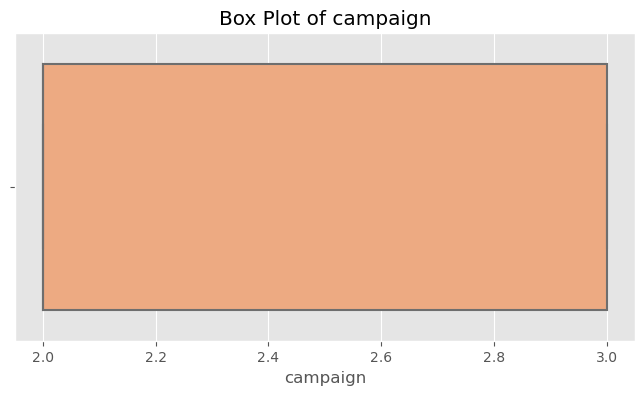

In [57]:
box_plot('campaign')

***
### `previous`

In [59]:
df['previous'] = df['previous'].astype('category')

In [60]:
cat_plot_bar_chart('previous')

_____________________________________________

the value counts for previous are 
0     3585
1      254
2      216
3      126
4       66
6       35
5       31
7       18
8       17
10      10
9        8
11       4
13       4
15       3
12       2
14       2
19       2
22       1
23       1
29       1
Name: previous, dtype: int64
_____________________________________________

the null value for previous is 
0
_____________________________________________



***

***

Text(220.72222222222223, 0.5, 'Features')

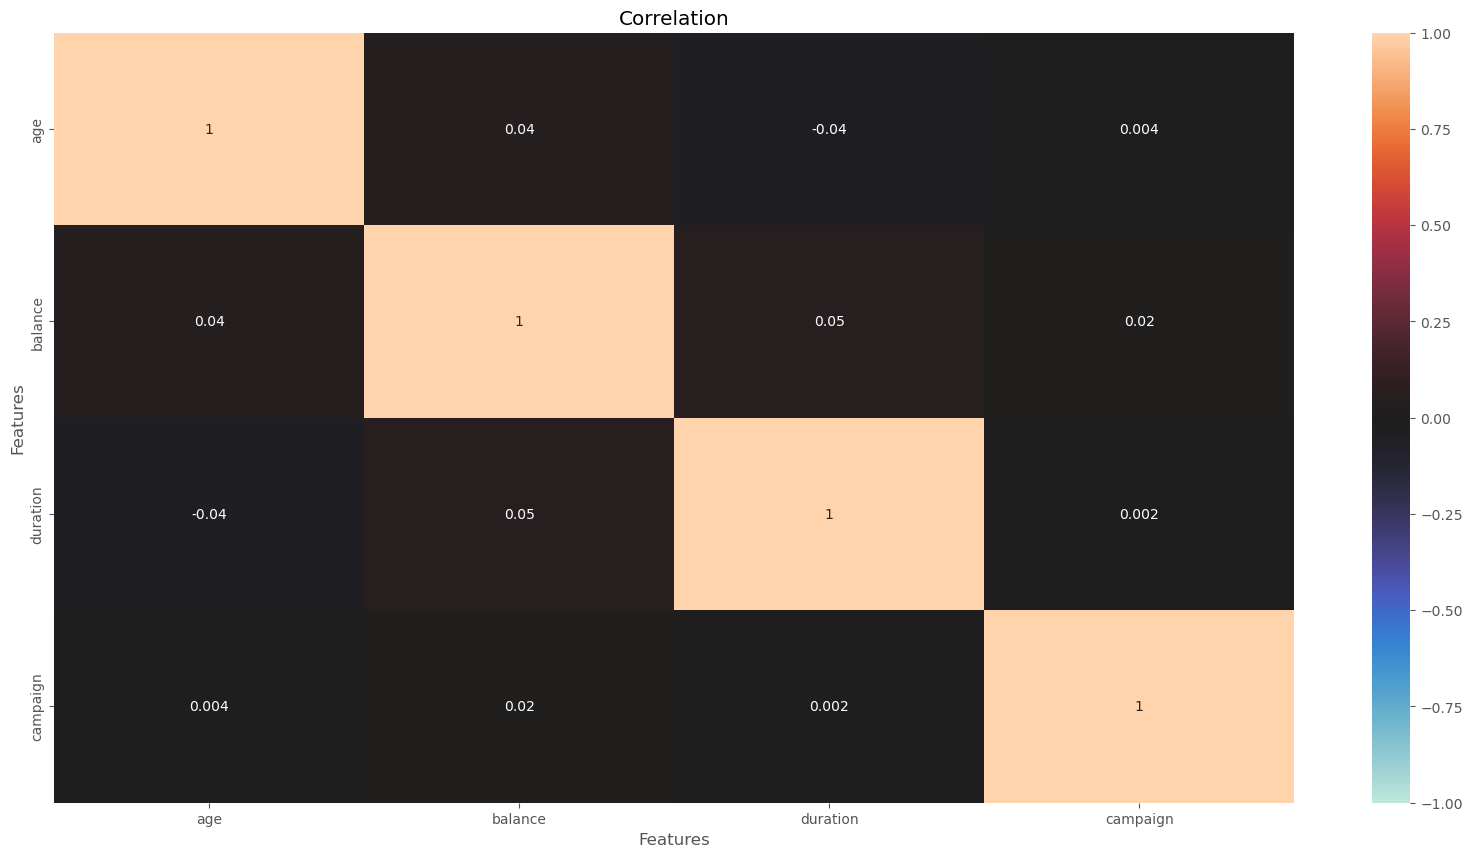

In [61]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
ax = sns.heatmap(df.corr(), annot = True, fmt='.1g', 
                 vmin=-1, vmax=1, center= 0)
plt.title("Correlation", y=1)
plt.xlabel("Features")
plt.ylabel("Features")

In [73]:
df.describe()

age      balance     duration     campaign
count  4386.000000  4386.000000  4386.000000  4386.000000
mean     40.686047   594.195394   194.910853     2.308254
std       7.139220   527.219093    87.866313     0.461825
min      31.000000     1.000000    72.000000     2.000000
25%      34.000000   172.250000   123.000000     2.000000
50%      39.000000   428.500000   175.000000     2.000000
75%      46.000000   892.000000   255.000000     3.000000
max      55.000000  2098.000000   407.000000     3.000000

In [74]:
df.describe(include="object").T

count unique          top  freq
job        4386     12  blue-collar  1060
marital    4386      3      married  2882
education  4386      4    secondary  2353
default    4386      2           no  4340
housing    4386      2          yes  2605
loan       4386      2           no  3677
contact    4386      3     cellular  2861
month      4386     12          may  1404
poutcome   4386      4      unknown  3585
Target     4386      2           no  4162

In [78]:
le = LabelEncoder()

df[['job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'poutcome',
    'Target']]=df[['job',
                   'marital',
                   'education',
                   'default',
                   'housing',
                   'loan',
                   'contact',
                   'month',
                   'poutcome',
                   'Target']].apply(le.fit_transform)


In [79]:
df

age  job  marital  education  default  balance  housing  loan  contact  \
38      37    1        1          1        0    342.0        1     0        0   
46      31    3        0          0        0    168.0        1     0        0   
48      34    2        1          0        0    165.0        1     0        0   
68      37    1        1          1        0    115.0        1     1        2   
86      41    9        2          1        0    568.0        1     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
54690   49    2        0          1        0    159.0        1     0        2   
54693   37    0        2          3        0    179.0        0     0        2   
54698   34    2        1          2        0    105.0        1     0        2   
54703   36    9        1          2        0    911.0        1     1        0   
54709   35    4        1          2        0    323.0        0     0        0   

       month  duration  campaign previous  poutcome  Target  
38         8       340         2        1         0       0  
46         8       266         3        0         3       0  
48         0       182         2        1         0       0  
68         8        91         3        0         3       0  
86         8        72         2        0         3       0  
...      ...       ...       ...      ...       ...     ...  
54690      8        95         3        0         3       0  
54693      8       100         3        0         3       0  
54698      8       249         2        0         3       0  
54703      8       117         2        3         0       1  
54709      4       261         2        0         3       1  

[4386 rows x 15 columns]

#### Separating independent and dependent variables


In [81]:
# feature variables
x= df.iloc[:, :-1]

# target variable
y= df.iloc[:, -1]

####  Checking Correlation of feature variables


<AxesSubplot:>

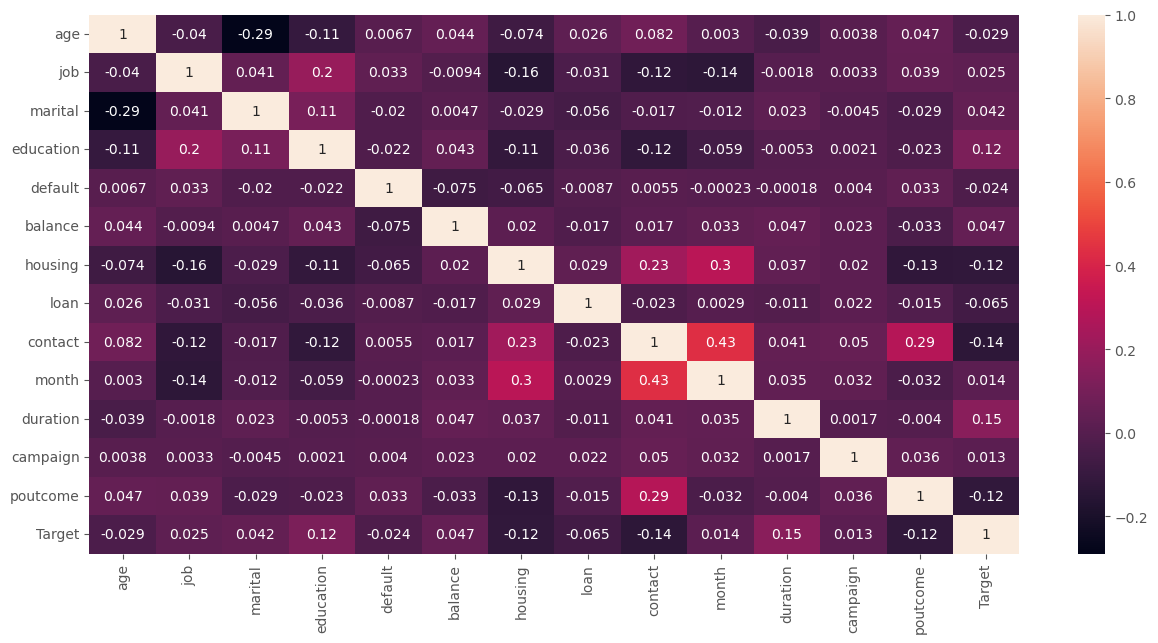

In [83]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

#### Handling imbalanced dataset

In [86]:
#initialising oversampling
smote= SMOTETomek(0.75)

#implementing oversampling to training data
x_sm, y_sm= smote.fit_sample(x,y)

# x_sm and y_sm are the resampled data

# target class count of resampled dataset
y_sm.value_counts()

NameError: name 'SMOTETomek' is not defined